In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Рынок заведений общественного питания Москвы

Исследование рынка заведений общепита Москвы проводится по заказу потенциальных инвесторов бизнес-проекта, в рамках которого предполагается организовать кафе или сеть кафе, где вместо обслуживающего персонала будут роботы. Задача данного анализа - выяснить, какие основные ниши существуют в сфере ресторанного бизнеса сегодня, что для них характерно (какой тип распространения, какие районы, какое количество посадочных мест итп). Конечная цель проекта - дать рекомендации заказчикам и обобщить для них основные выводы анализа текущего положения дел на рынке.


### Содержание:

[Выгрузка данных](#chapter1)

[Аналз данных](#chapter2)

 * [Различия между типами заведений](#section1)
 * [Улицы, где много заведений общепита](#section2)
 * [Рестораны](#section3)
 * [Кафе](#section4)
 * [Фастфуд](#section5)
 * [Столовые](#section6)
 * [Бары](#section7)
 * [Одно заведение на всю улицу](#section8)
 * [Количество мест на улицах, где больше всего заведений](#section9)
 
[Общий вывод](#chapter3)

[Презентация](#chapter4)

## Выгрузка данных <a id="chapter1"></a>

In [2]:
data = pd.read_csv('rest_data.csv')
display(data.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


In [4]:
print(data.chain.unique())

['нет' 'да']


In [5]:
print(data.object_type.unique())

['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


In [6]:
# Дадим более удобные, понятные и лаконичные названия столбцам
data = data.rename(columns = {'object_name' : 'name', 'object_type' : 'type', 'number': 'seats'})
display(data.head())

,id,name,chain,type,address,seats
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [7]:
# Проверим нет ли в таблице заведений, с одними и теми же названием, адресом и типом заведения
# (если совпадают только название и адрес - это нормально, потому что некоторые столовые, например,
# в вечерние часы работают как кафе или рестораны, с другим меню, ценами, способом обслуживания итд.)
name_type_address = data[['name', 'type', 'address']]
print(name_type_address.duplicated().sum())

171


In [8]:
# Создадим таблицу со столбцом duplicated из результатов выполнения фунуции duplicated()
duplicated = pd.DataFrame(name_type_address.duplicated(), columns =['duplicated'])
# Объединим ее с таблицей data по индексу
data = data.join(duplicated)
display(data.head())

,id,name,chain,type,address,seats,duplicated
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,False
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,False
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,False


In [9]:
# Избавимся от обнаруженных дубликатов
data = data.drop(data[data['duplicated'] == True].index).reset_index(drop=True)
# Теперь столбец duplicated нам больше не нужен, уберем его
data = data.drop('duplicated', 1)
print(data.shape)

(15195, 6)


In [10]:
# Дадим лаконичные названия типам заведений

for i in range (len(data)):
    if data['type'][i] == 'магазин (отдел кулинарии)':
        data['type'][i] = 'кулинария'
    elif data['type'][i] == 'предприятие быстрого обслуживания':
        data['type'][i] = 'фастфуд'

Данные в порядке, артефактов не обнаружено, все типы данных корректные, пропусков нет, названия столбцов и типов заведений заменены, удалены дубликаты.

## Анализ данных <a id="chapter2"></a>

### Различия между типами заведений: количество ресторанов, количество посадочных мест; различия между сетевыми и несетевыми заведениями <a id="section1"></a> 

In [11]:
# Создадим таблицу для разных типов сетевых и несетевых ресторанов, где будет посчитано
# количесвтво заведений и среднее число посадочных мест для каждого типа
types = data.groupby(['type', 'chain'], as_index = False).agg({'id': 'count', 'seats': 'mean'})
types = types.rename(columns = {'id': 'restaurants'})

types.chain = types.chain.map({'да': "сетевые", 'нет': "несетевые"})        
display(types.head())

,type,chain,restaurants,seats
0,бар,сетевые,37,53.027027
1,бар,несетевые,816,43.175245
2,буфет,сетевые,11,12.727273
3,буфет,несетевые,560,52.335714
4,закусочная,сетевые,56,14.375000


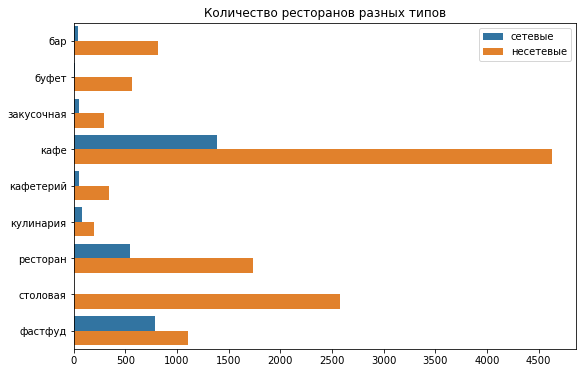

In [12]:
# Построим график количества ресторанов разного типа, сетевых и несетевых
plt.figure(figsize=(9, 6))
ax = sns.barplot(y = 'type', x = 'restaurants', data = types, hue = 'chain')
plt.legend()
ax.set_xticks([i for i in range(0, 5000, 500)])
ax.set_xlabel('')
ax.set_ylabel("")
plt.title("Количество ресторанов разных типов")
plt.show()

1. Чаще всего встречаются кафе (более 6000 в общей сложности), столовые (около 2600), рестораны (около 2300) и фастфуд (около 2000). Баров, как и буфетов, - меньше тысячи, остальных заведений менее - 500 штук на каждый вид.

2. Несетевых кафе больше, чем сетевых для каждого вида. Доля сетевых больше всего в фастфуде. Если говорить об абсоютных цифрах, то сетевых заведений также достаточно много среди кафе (около 1500) и среди ресторанов - более 500.

In [13]:
# Изучим соотношение долей сетевых и несетевых заведений. Чтобы цвета на графике распределились так же,
# как на предыдущем (голубой - сетевые, оранжевый - несетевые), отсортируем в обратном алфавитном порядке - сначала сетевые
is_chain = types.groupby('chain').agg({'restaurants' : 'sum'}).sort_values(by='chain', ascending = False)
display(is_chain)
print()
# Узнаем, сколько всего мест в сетевых и несетевых заведениях
chain_seats = data.groupby('chain').agg({'seats': 'sum'})
display(chain_seats)

,restaurants
chain,
сетевые,2950
несетевые,12245


,seats
chain,
да,156377
нет,753798


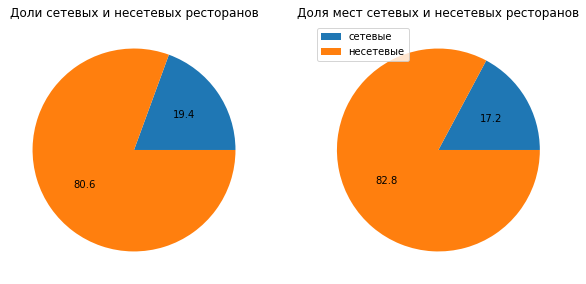

In [14]:
# Построим круговую диаграмму долей сетевых и несетевых ресторанов
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
is_chain.restaurants.plot(kind = 'pie', autopct='%.1f', labels = ['', ''])
plt.ylabel("")
plt.title('Доли сетевых и несетевых ресторанов')

# Построим круговую диаграмму соотношения количества мест в сетевых и несетевых заведениях
#plt.figure(figsize = (5, 5))
plt.subplot(1, 2, 2)
chain_seats.seats.plot(kind = 'pie', autopct='%.1f', labels = ['', ''])
plt.legend(['сетевые', "несетевые"])
plt.ylabel("")
plt.title('Доля мест сетевых и несетевых ресторанов')
plt.show()

Сравнение сетевых и несетевых заведений, что по количеству ресторанов, что по количеству посадочных мест, дает один и тот же результат - доля несетевых чуть больше 80% - как по количеству заведений, так и по посадочным местам. Теперь посмотрим, как обстоит дело со средним числом мест для каждого типа заведения.  

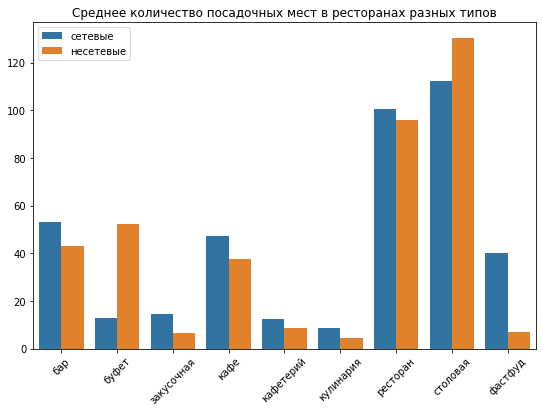

In [15]:
# График среднего количества мест для заведений разных типов
plt.figure(figsize=(9, 6))
ax = sns.barplot(x = 'type', y = 'seats', data = types, hue = 'chain')
plt.xticks(rotation = 45)
plt.legend()
ax.set_xlabel('')
ax.set_ylabel("")
plt.title("Среднее количество посадочных мест в ресторанах разных типов")
plt.show()

In [16]:
only_chains = data.query('chain == "да"')
chains_grouped = only_chains.groupby('name', as_index = False).agg({'id': 'count', 'seats': 'mean'}).sort_values(by='name')
chains_grouped = chains_grouped.rename(columns={'id':'restaurants'})
print("Медианное значение числа ресторанов в сети: " + str(chains_grouped.restaurants.median()))
print("Медианное значение среднего числа мест в ресторане сети: " + str(chains_grouped.seats.median()))

Медианное значение числа ресторанов в сети: 1.0
Медианное значение среднего числа мест в ресторане сети: 45.0


Как минимум половина сетей в Москве имеют одно заведение, что, на первый взгляд странно: в сети должно быть более одного кафе, иначе это не сеть. Очевидно, в данном случае, это очень молодые сети, например, сети пришедшие в Москву из других регионов и еще не распространившиеся, либо (пока еще) не считающие Москву основным рынком для себя. В том числе есть сети, распространившиеся по Московской области, представленные в городе одной штукой. В последнем случае их кафе - это часть сети для данного региона (не в администратином, а географическом смысле). Так или иначе, сети со слишком малым числом кафе мешают адекватному анализу бизнес-стратегии сетей, которые хотят развиваться именно в Москве. У таких сетей кафе мало не обязательно потому, что они решили брать числом мест, а не точек. Скорее, просто еще не развились достаточно, или даже не определились, хотят ли развиваться в Москве. Имеет смысл выделить сегмент сетей, которые есть в Москве не потому, что "мимо проходил, решил заглянуть": возьмем срез, где будут сети, в которых как минимум 5 заведений.</div>

In [17]:
true_chains = chains_grouped.query('restaurants > 4')
print("Медианное значение числа ресторанов в сети: " + str(true_chains.restaurants.median()))
print("Медианное значение среднего числа мест в ресторане сети: " + str(true_chains.seats.median()))

Медианное значение числа ресторанов в сети: 9.0
Медианное значение среднего числа мест в ресторане сети: 38.57142857142857


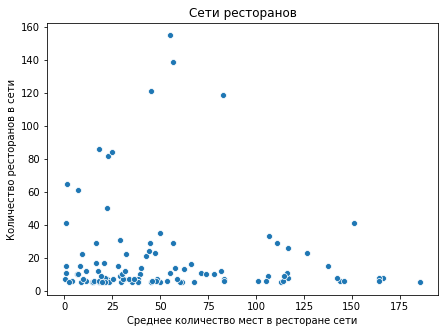

In [18]:
plt.figure(figsize = (7, 5))
sns.scatterplot(x = 'seats', y = 'restaurants', data = true_chains)
plt.xlabel('Среднее количество мест в ресторане сети')
plt.ylabel('Количество ресторанов в сети')
plt.title('Сети ресторанов')
plt.show()

1. Больше всего посадочных мест - в столовых и ресторанах (больше ста и около ста - соответственно). В барах, кафе, сетевом фастфуде и несетевых буфетах - раза в два поменьше (от 40 до 60). В заведениях других типов - в среднем менее 20 мест.

2. В большинстве типов заведений среднее число посадочных мест для сетевых и несетевых заведений - примерно одинаковое.

3. Есть три исключения: несетевые буфеты в среднем заметно крупнее сетевых, обратным образом дело обстоит с закусочными и фастфудом. И для фастфуда в особенности - сетевые заведения фастфуда в среднем в несколько раз крупнее, чем несетевые. С учетом того, что доля сетевых ресторанов среди фастфуда несильно меньше, чем доля сетевых, можно сказать, что по суммарному количеству мест сетевой фастфуд также в несколько раз больше несетевого.

4. Трудно сказать однозначно, что характерно для сетей в большей степени: мало ресторанов и много мест в них или наоборот много ресторанов и мало мест. Судя по графику примерно половина сетей делает ставку на распространенность по городу, другая половина - на количество мест в одном ресторане.

### Улицы, где много заведений общепита <a id="section2"></a>

In [19]:
# Создадим пустой список для названий улиц для каждой записи в таблице
streets = []

for row in data['address']:
    # Получим список элементов каждой ячейки с адресом
    parts = row.split(', ')
    # Если в адресе город не указан, то улица - первый элемент
    if "город" not in parts[0]:
        streets.append(parts[0])
    # В противном случае если второй элемент не город, то это улица
    elif "город" not in parts[1] and "поселение" not in parts[1]:
        streets.append(parts[1])
    # В противном случае если третий элемент не поселение и не поселок, то это улица
    elif "поселение" not in parts[2] and "посёлок" not in parts[2]:
        streets.append(parts[2])
    # В крайнем случае улица - это четвертый элемент
    else:
        streets.append(parts[3])

# Проверим, совпадают ли размеры таблицы и получившегося списка       
assert(len(streets) == len(data))

In [20]:
# Превратим список улиц в датафрейм
street = pd.DataFrame(data = streets, columns = ['street'])

In [21]:
display(street.head())

,street
0,улица Егора Абакумова
1,улица Талалихина
2,Абельмановская улица
3,Абрамцевская улица
4,Абрамцевская улица


In [22]:
# Объединим две таблицы по индексу
new_data = data.join(street)
display(new_data.head())

,id,name,chain,type,address,seats,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [23]:
# Сгруппируем данные по столбцу street. Отсортируем по убыванию
by_street = new_data.groupby('street', as_index=False)['id'].count().sort_values(by = 'id', ascending=False).reset_index(drop=True)
top_ten_streets = by_street.head(10)

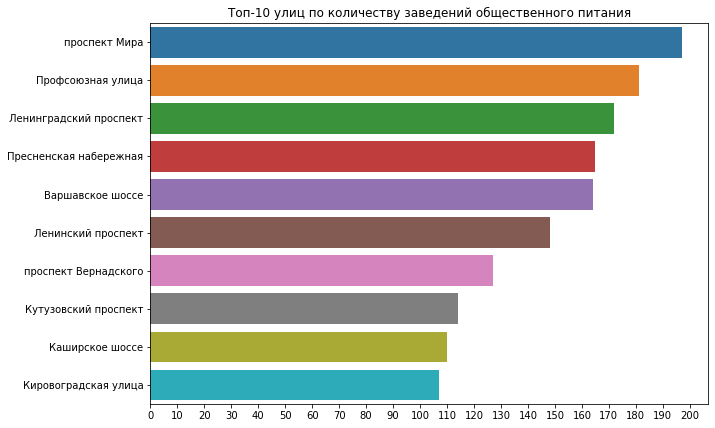

In [24]:
# Построим график топ-10 улиц по количеству заведений общепита
plt.figure(figsize=(10, 7))
sns.barplot(y='street', x = 'id', data = top_ten_streets)
plt.ylabel('')
plt.xlabel('')
plt.xticks([x for x in range(0, 201, 10)])
plt.title("Топ-10 улиц по количеству заведений общественного питания")
plt.show()

In [25]:
# Извлечем внешние данные для определения списка районов, где проходят топ-10 улиц
from io import BytesIO
import requests
spreadsheet_id = "1IJHGwt6shBsMKiqT1BmOrKp__qyABMVbuCDKrzrj2RQ"
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz = pd.read_csv(BytesIO(r.content))
display(mosgaz.head())

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [26]:
# Извлечем из этих данных список районов
my_areas = mosgaz.query('streetname in @top_ten_streets.street')
print(my_areas.area.unique())

['Пресненский район' 'Район Дорогомилово' 'Район Фили-Давыдково'
 'Район Проспект Вернадского' 'Район Раменки' 'Район Тропарево-Никулино'
 'Район Аэропорт' 'Район Беговой' 'Хорошевский район' 'Район Сокол'
 'Алексеевский район' 'Ярославский Район' 'Район Марьина роща'
 'Останкинский район' 'Район Ростокино' 'Район Свиблово'
 'Район Чертаново Центральное' 'Район Чертаново Северное'
 'Район Чертаново Южное' 'Донской район' 'Район Москворечье-Сабурово'
 'Район Нагатино-Садовники' 'Нагорный район'
 'Район Орехово-Борисово Южное' 'Район Орехово-Борисово Северное'
 'Академический район' 'Район Черемушки' 'Район Гагаринский'
 'Район Ясенево' 'Район Коньково' 'Ломоносовский район'
 'Обручевский район' 'Район Северное Бутово' 'Район Теплый Стан'
 'Район Южное Бутово' 'Район Якиманка' 'Мещанский район']


10 улиц с наибольшим числом заведений общепита - это главные магистрали города, соединяющие окраины с центром, за исключением Кировоградской улицы, которая находится на юге Москвы и Пресненской набережной - в районе Делового центра Москва-сити. Эти улицы проходят через 37 районов города. Однако, интересно посмотреть отдельно на топ-10 для ресторанов, для баров, для кафе итд. Эти списки могут различатья между собой и от того, который мы уже получили.

In [27]:
# Создадим сводную таблицу, где наблюдениями будут улицы, столбцами - типы заведений,
# значениями - количество заведений

new_data_pivot = new_data.pivot_table(index = 'street', columns = 'type', values = 'id', aggfunc = 'count')
new_data_pivot = new_data_pivot.fillna(0).astype('int')

### Рестораны <a id="section3"></a>

In [28]:
# Функция для построения графиков топ-10 улиц для отдельных типов заведения. Аргумент - тип заведения.
def make_some_plots(rest_type):
    # Сортируем сводную таблицу по интересующему типу заведения, вычленяем верхние 10 строк
    df = new_data_pivot.sort_values(by = rest_type, ascending = False).head(10).reset_index()
    # Строим график, по оси x - улица, по оси y - тип заведения
    plt.figure(figsize =(10, 7))
    sns.barplot(x = 'street', y = rest_type, data = df)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation = 60)

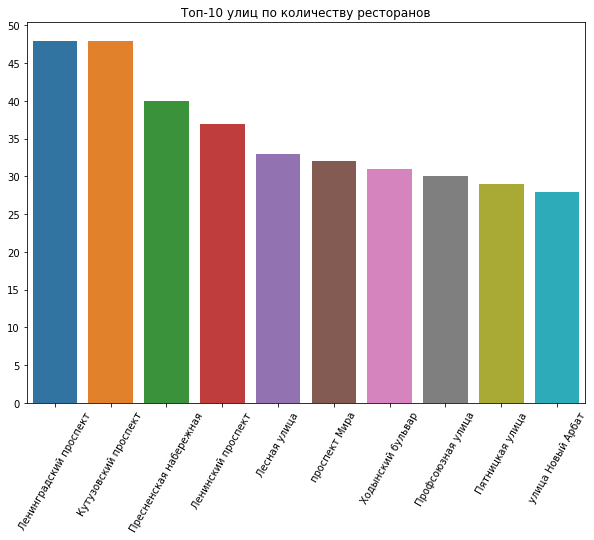

In [29]:
# График для ресторанов
make_some_plots('ресторан')
plt.yticks([x for x in range(0, 51, 5)])
plt.title("Топ-10 улиц по количеству ресторанов")
plt.show()

В топ-10 улиц по ресторанам вошли некоторые улицы центра: Лесная, Пятницкая, Новый Арбат. Также здесь появился Ходынский бульвар - он не далеко от центра, но уже в Северном АО, рядом с метро "Динамо". Эти районы тоже довольно богатые.

### Кафе<a id="section4"></a>

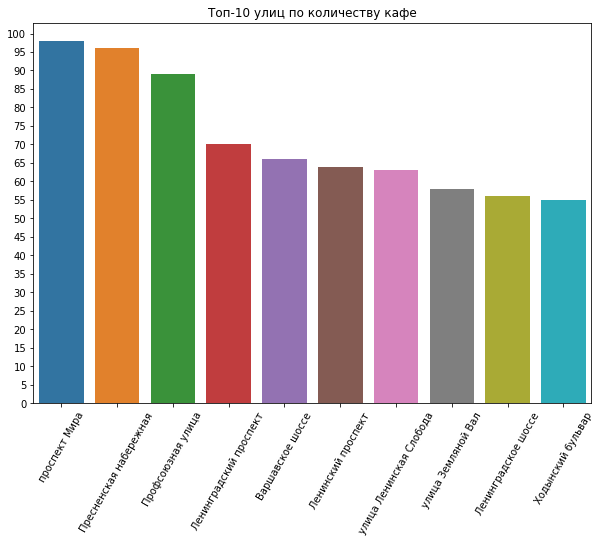

In [30]:
# График для кафе
make_some_plots('кафе')
plt.yticks([x for x in range(0, 101, 5)])
plt.title("Топ-10 улиц по количеству кафе")
plt.show()

В топ-10 нет улиц самого центра, если не считать кусочек Садового кольца - Земляной вал. Также ес Ходынский бульвар и улица Ленинская Слобода. В остальном - список тот же, что и по всем видам заведений, что не удивительно, ведь кафе - самый крупный вид.

### Фастфуд <a id="section5"></a> 

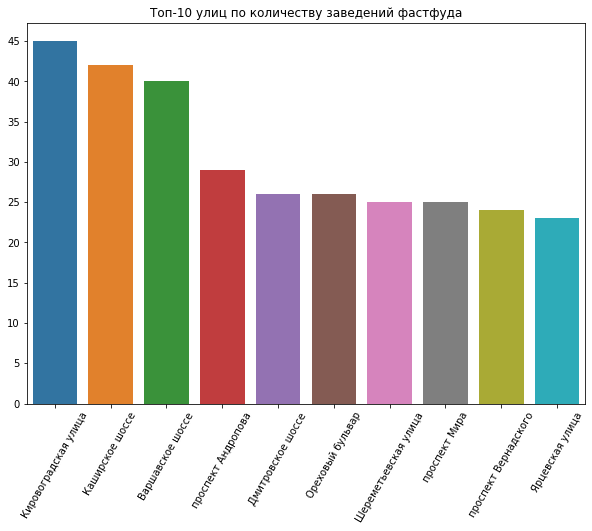

In [31]:
# График для фастфуда
make_some_plots('фастфуд')
plt.yticks([x for x in range(0, 46, 5)])
plt.title("Топ-10 улиц по количеству заведений фастфуда")
plt.show()

Фастфуд - любит крупные улицы, но на окраинах. Южный и Северо-Восточный округа - самые густонаселенные.

### Столовые <a id="section6"></a>

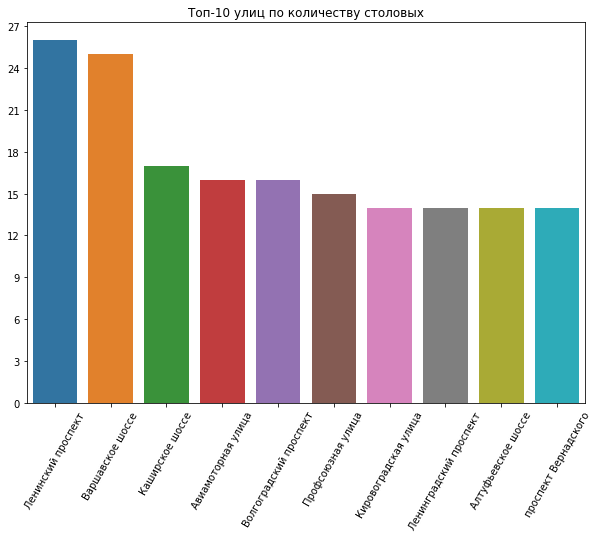

In [32]:
# График для столовых
make_some_plots('столовая')
plt.yticks([x for x in range(0, 28, 3)])
plt.title("Топ-10 улиц по количеству столовых")
plt.show()

В столовые обычно ходят в перерыве на работе или в школах, например. В этом топе - самые длинные улицы. Из нового - Авиамоторная, Волгоградский проспект, Алтуфьевское шоссе. Рабочие районы.

### Бары <a id="section7"></a>

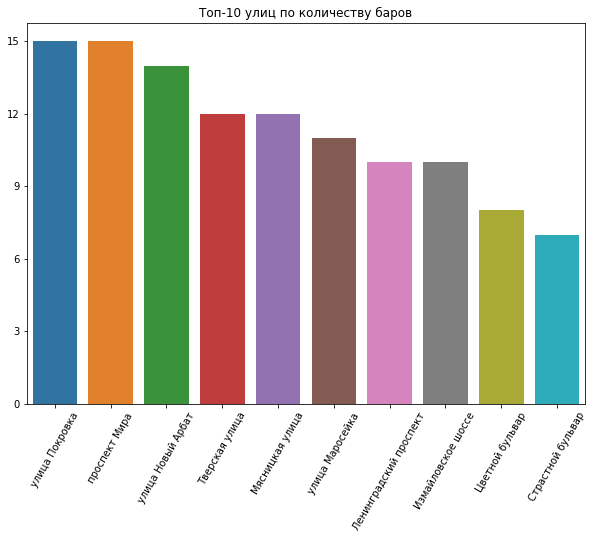

In [33]:
# График для баров
make_some_plots('бар')
plt.yticks([x for x in range(0, 16, 3)])
plt.title("Топ-10 улиц по количеству баров")
plt.show()

Бары в основном находятся в центре. Места для молодежи, туристов итд. Восемь улиц из десяти - в пределах Садового, в том числе Тверская, Покровка, Мясницкая, бульвары - самые популярные туристические места. Измайловское шоссе - немного удивительно, это далеко от центра. Впрочем, Измайлово старый район, рядом парк. Значит,  и там гуляют.

### Одно заведение на всю улицу <a id="section8"></a>

In [34]:
# Сделаем срез для улиц, где только одно заведение
only_one = by_street.query('id == 1')
# Изучим, что за улицы попали в этот срез: возьмем первые 20 штук
display(only_one.head(20))
# Сравним число таких улиц с общим числом улиц в базе данных
print(len(only_one))
print(new_data.street.nunique())

,street,id
1419,6-я улица Новые Сады,1
1420,улица Константинова,1
1421,Несвижский переулок,1
1422,6-я улица Лазенки,1
1423,улица Льва Яшина,1
1424,Неманский проезд,1
1425,Симферопольский проезд,1
1426,Нелидовская улица,1
1427,Синельниковская улица,1
1428,Научный проезд,1


722
2141


In [35]:
# Извлечем список районов, где находятся улицы только с одним заведением
lots_of_areas = mosgaz.query('streetname in @only_one.street')
print(lots_of_areas.area.unique())

['Пресненский район' 'Таганский район' 'Тверской район' 'Район Арбат'
 'Район Замоскворечье' 'Район Богородское' 'Район Гольяново'
 'Район Измайлово' 'Район Косино-Ухтомский' 'Басманный район'
 'Район Метрогородок' 'Район Новогиреево' 'Район Перово'
 'Район Преображенское' 'Район Северное Измайлово' 'Район Соколиная Гора'
 'Район Восточное Измайлово' 'Район Восточный' 'Район Ивановское'
 'Район Сокольники' 'Район Дорогомилово' 'Район Филевский Парк'
 'Район Фили-Давыдково' 'Район Кунцево' 'Можайский Район'
 'Район Ново-Переделкино' 'Район Очаково-Матвеевское' 'Район Раменки'
 'Район Солнцево' 'Район Внуково' 'Район Крюково'
 'Район Матушкино-Савелки' 'Панфиловский район' 'Район Аэропорт'
 'Район Беговой' 'Бескудниковский Район' 'Дмитровский район'
 'Головинский район' 'Хорошевский район' 'Район Коптево'
 'Район Левобережный' 'Молжаниновский район' 'Савеловский район'
 'Район Сокол' 'Тимирязевский Район' 'Войковский Район'
 'Район Западное Дегунино' 'Алексеевский район' 'Алтуфьевский ра

В каких районах Москвы расположены эти улицы?

Всего в базе данных по московским кафе 2141 улица, на 722 одной из них (это каждая третья улица, попавшая в базу) расположено только одно заведение. Здесь можно выделить такие категории районов:

1. Центральные районы (в некоторых переулках центра мало кафе, потому что это маленькие переулки)
2. Километры Московской Кольцевой Автодороги. Районы на окраинах во всех направлениях о центра
3. Проезды на окраинах, улицы в промзонах итп. Это либо индустриальные районы, либо просто малонаселенные места.
4. Просеки в парках.

Таким образом на количество заведений влияют два фактора: количество людей, которые могут оказаться на данной улице, и ее размер.

### Количество мест на улицах, где больше всего заведенний <a id="section9"></a>

In [36]:
# Создадим срез данных по списку улиц из числа топ-10.
# Отсортируем значения посадочных мест по возрастанию
top_ten_data = new_data.query('street in @top_ten_streets.street').sort_values(by = 'seats')

In [37]:
# Выведем среднее, медиану и моду количества мест в заведениях в топ-10 улицах. 
print("Среднее количество мест в заведениях топ-10: " + str(int(top_ten_data.seats.mean())))
print("Медианное количество мест в заведениях топ-10: " + str (int(top_ten_data.seats.median())))
print("Самое распространенное число мест в заведениях топ-10: " + str(int(top_ten_data.seats.mode())))

Среднее количество мест в заведениях топ-10: 58
Медианное количество мест в заведениях топ-10: 40
Самое распространенное число мест в заведениях топ-10: 0


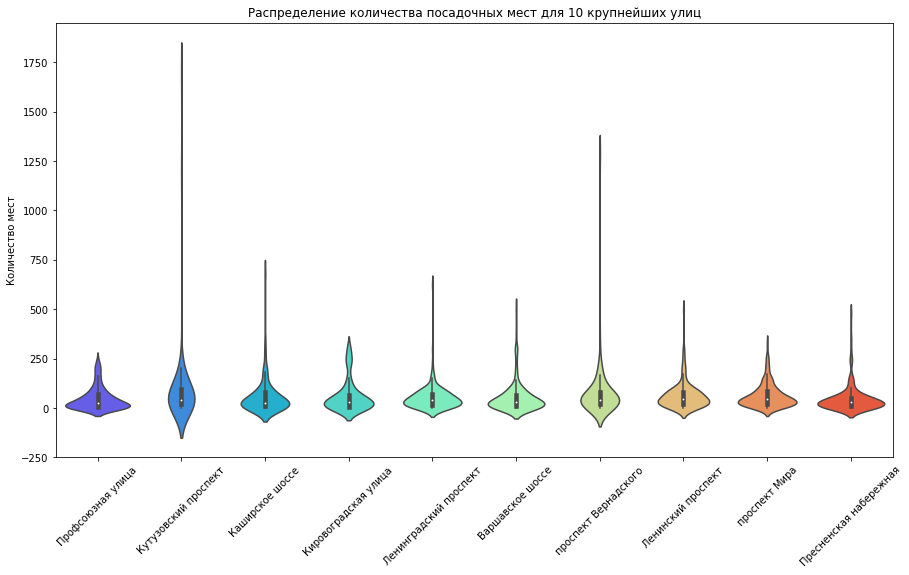

In [38]:
# Построим "виолончели" для изучения распределения количества мест
plt.figure(figsize = (15, 8))
sns.violinplot(x = 'street', y = 'seats', data = top_ten_data, palette = 'rainbow')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Количество мест')
plt.title("Распределение количества посадочных мест для 10 крупнейших улиц")
plt.show()

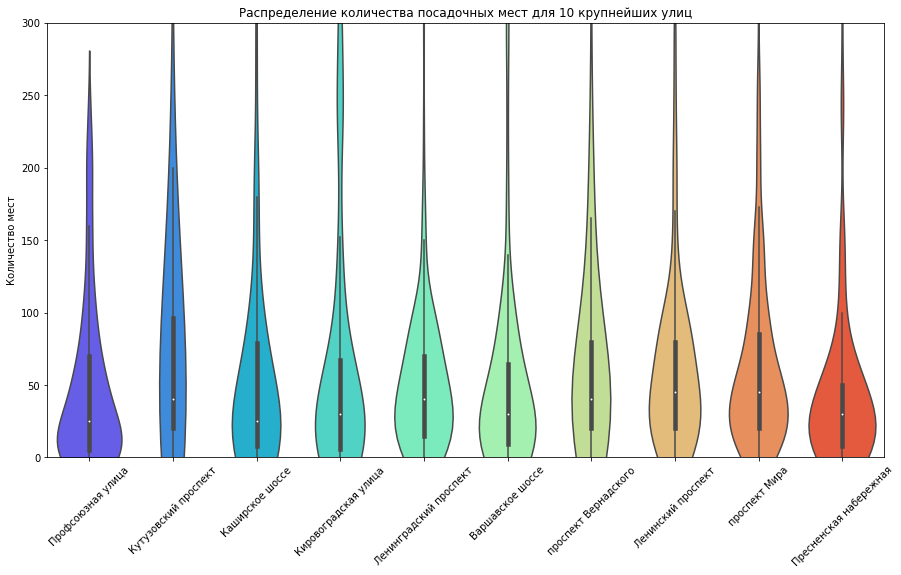

In [39]:
# Те же виолончели. Нижние 300 делений по оси y в более крупном масштабе.
plt.figure(figsize = (15, 8))
sns.violinplot(x = 'street', y = 'seats', data = top_ten_data, palette = 'rainbow')
plt.xticks(rotation=45)
plt.ylim(0, 300)
plt.xlabel('')
plt.ylabel('Количество мест')
plt.title("Распределение количества посадочных мест для 10 крупнейших улиц")
plt.show()

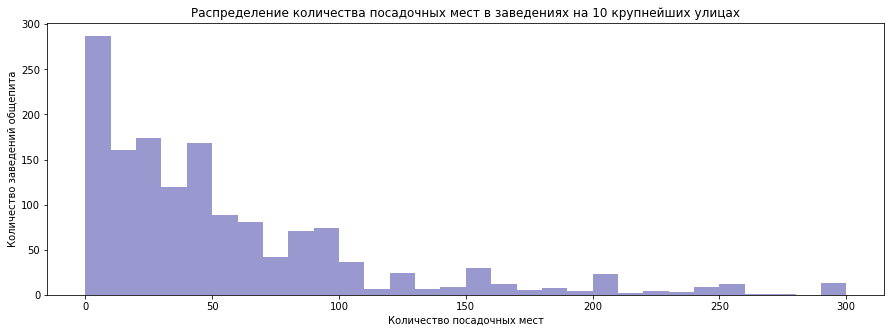

In [40]:
# График распределения количества мест, диапазон от 0 до 300 мест, по 30 корзинам.
plt.figure(figsize=(15, 5))
sns.distplot(top_ten_data['seats'], kde = False, bins=30, hist_kws = {'range': (0, 300)}, color = 'darkblue')
plt.xlabel("Количество посадочных мест")
plt.ylabel("Количество заведений общепита")
plt.title("Распределение количества посадочных мест в заведениях на 10 крупнейших улицах")
plt.show()

Медианные значения количества посадочных мест для 10 крупных улиц находятся в диапазоне от 30 до 50. 75% всех значений находится в пределах от 50 с небольшим до 100 мест (100 - для Кутузовского проспекта). На Кутузовском проспекте и проспекте Вернадского есть заведения, где больше тысячи мест, на Кутузовском даже доходит до 1750. Как видно на последнем графике, чем больше мест в заведении, тем меньше таких заведений.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Отлично! Полезные графики и грамотные выводы!
</div>

## Общий вывод <a id="chapter3"></a>

1. Лучше всего представлен такой вид общипита как кафе. Немало встречается среди кафе сетевых, хотя несетевых заметно больше, при этом среднее число посадочных мест для сетевых и несетевых кафе различается незначительно.
2. Также достаточно много в городе ресторанов, столовых и фастфуда. Ресторанов и столовых меньше, чем кафе, но зато в них в два раза больше мест. И в целом, чем больше  в заведениии мест, тем меньше таких заведений.
3. Для фастфуда наиболее характерен сетевой способ распростарнения. Посадочных мест в сетевом фастфуде значительно больше, чем в несетевом.
4. В целом основная масса заведений на самых крупных улицах имеют не более нескольких десятков посадочных мест.
5. Улицы центра попадают в топ-10 по количеству ресторанов, кафе и баров. В особенности это заметно по барам: сразу 8 центальных улиц проникают в топ и вытесняют большие проспекты. Фастфуд и столовые - наоборот популярнее на окраинах. В топ сразу попадают такие названия, как Ореховый бульвар, Алтуфьевское шоссе итп.

Рекомендации:

Те, у кого есть деньги и желание рискнуть, могут попробовать открыть свое кафе с роботами на тех улицах, где кафе мало. С этого шага может начаться джентрификация какой-нибудь промзоны. Роботы там будут смотреться даже органично. Тот, кто откроет там ресторан, будет там первым, а также сможет конкурировать, вводя более низкие цены, за счет того, что арендная плата будет не велика. Чаевые роботов достанутся вам, это тоже выгодно. Главное, чтобы кафе было оригинальным, чтобы было чем завлечь людей в спальный район. Концерты там организовывать итп. Начать следует с 20-30 посадочных мест, но по мере раскрутки быть готовым увеличить их число.

Еще лучше - основать сеть баров в маленьких переулках в центре: можно демпинговать и оттягивать посетителей с Покровки и Тверской. Роботов надо научить жонглировать рюмками, поджигать самбуку и спрашивать "Вам повторить?" В баре должно быть мест 50, как в среднем в московских барах.

Что касается фастфуда, то ему лучше открывать новые точки в людных местах,  мест на 40-50, на крупных улицах. Роботы не должны сильно отличаться от людей, одеваться в соответствии с дресскодом, предлагать картофель-фри. Нужно стараться вытеснить всякие мелкие беспосадочные чебуречные, разнообразя ассортимент, открывая больше окошек на вынос. Выгодным оличием от Макдоналдса может стать наличие гардероба (с вежливым роботом-гардеробщиком, разумеется). Зимой это позволит сохранить количество посадочных мест, в то время как в Макдоналдсе все будт класть куртку рядом с собой, и нежелающие ждать с подносом около столиков - уйдут в ваше заведение с роботами.

## Презентация <a id="chapter4"></a>

Презентация: https://yadi.sk/i/4YaOTr5QNPkb5A